In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks")

In [26]:
claims = pd.read_csv('claims.csv')

In [27]:
cust_demographics = pd.read_csv('cust_demographics.csv')

In [28]:
claims.head().T

,0,1,2,3,4
claim_id,54004764,33985796,53522022,13015401,22890252
customer_id,21868593,75740424,30308357,47830476,19269962
incident_cause,Driver error,Crime,Other driver error,Natural causes,Crime
claim_date,11/27/2017,10/03/2018,02/02/2018,06/17/2018,01/13/2018
claim_area,Auto,Home,Auto,Auto,Auto
police_report,No,Unknown,No,No,No
claim_type,Material only,Material only,Material only,Material only,Material only
claim_amount,$2980,$2980,$3369.5,$1680,$2680
total_policy_claims,1.0,3.0,1.0,1.0,1.0
fraudulent,No,No,Yes,No,No


In [29]:
cust_demographics.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [30]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


In [31]:
cust_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1085 non-null   int64 
 1   gender       1085 non-null   object
 2   DateOfBirth  1085 non-null   object
 3   State        1085 non-null   object
 4   Contact      1085 non-null   object
 5   Segment      1085 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


#### Merging datasets 

In [32]:
cust_claims = claims.merge(cust_demographics,how='inner',left_on='customer_id',
                           right_on='CUST_ID')

#### Checking for data types

In [33]:
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   customer_id          1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1020 non-null   object 
 8   total_policy_claims  1075 non-null   float64
 9   fraudulent           1085 non-null   object 
 10  CUST_ID              1085 non-null   int64  
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

'claim_date' and 'DateOfBirth' are 'object' datatype. We will convert to datetime.

'claim_amount' should be 'numeric' data type.

In [34]:
cust_claims['claim_date'] = pd.to_datetime(cust_claims['claim_date'],format='%m/%d/%Y')
cust_claims['DateOfBirth'] = pd.to_datetime(cust_claims['DateOfBirth'],format='%d-%b-%y')

#### Data Cleaning

In [35]:
# Year of birth before 1969 is wrongly entered as '20--'. 
cust_claims['DateOfBirth'].dt.year.unique()

array([1979, 1970, 1984, 1986, 1977, 1999, 1993, 2066, 1985, 1990, 2063,
       1969, 1987, 2065, 2067, 1974, 1980, 1981, 1995, 1996, 2062, 1994,
       2068, 1971, 1988, 1989, 1976, 1975, 2064, 1998, 2060, 2061, 1972,
       1992, 1997, 1973, 1982, 1978, 1991, 1983])

In [36]:
# Function to correct date of birth
def correct_year(date):
    if int(date.strftime("%y")) < 69:
        crct_date = date.replace(year = date.year -100)
    else:
        crct_date = date
    return crct_date      

cust_claims['DOB_crct'] = cust_claims['DateOfBirth'].apply(correct_year)

In [37]:
cust_claims['DOB_crct'].dt.year.unique()

array([1979, 1970, 1984, 1986, 1977, 1999, 1993, 1966, 1985, 1990, 1963,
       1969, 1987, 1965, 1967, 1974, 1980, 1981, 1995, 1996, 1962, 1994,
       1968, 1971, 1988, 1989, 1976, 1975, 1964, 1998, 1960, 1961, 1972,
       1992, 1997, 1973, 1982, 1978, 1991, 1983])

In [38]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
# Remove $ sign form 'claim_amount'
cust_claims['claim_amount'] = pd.to_numeric(cust_claims['claim_amount'].str.\
                                            replace('$',''))

In [40]:
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1085 non-null   int64         
 1   customer_id          1085 non-null   int64         
 2   incident_cause       1085 non-null   object        
 3   claim_date           1085 non-null   datetime64[ns]
 4   claim_area           1085 non-null   object        
 5   police_report        1085 non-null   object        
 6   claim_type           1085 non-null   object        
 7   claim_amount         1020 non-null   float64       
 8   total_policy_claims  1075 non-null   float64       
 9   fraudulent           1085 non-null   object        
 10  CUST_ID              1085 non-null   int64         
 11  gender               1085 non-null   object        
 12  DateOfBirth          1085 non-null   datetime64[ns]
 13  State                1085 non-nul

#### Checking for Missing Values

In [41]:
cust_claims.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
DOB_crct                0
dtype: int64

In [42]:
# Replace 'claim_amount' by mean and 'total_policy_claims' by mode
cust_claims['claim_amount'].fillna(cust_claims['claim_amount'].mean(), inplace=True)
cust_claims['total_policy_claims'].fillna(cust_claims['total_policy_claims'].mode()[0],\
                                          inplace=True)

#### Checking for duplicates based on customer_id

In [44]:
cust_claims[cust_claims.duplicated('customer_id')]

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,DOB_crct
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,1984-03-11
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,1986-05-01
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,1977-05-13
9,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,21831191,Male,1977-05-17,NH,419-712-8513,Gold,1977-05-17
608,78221963,84147585,Driver error,2018-04-10,Auto,Yes,Injury only,14430.0,4.0,No,84147585,Male,1972-10-18,AK,743-569-4783,Gold,1972-10-18
610,1654201,85357756,Driver error,2018-06-23,Auto,Unknown,Material only,2510.0,1.0,No,85357756,Male,1970-01-02,PA,915-698-3649,Platinum,1970-01-02
612,41779510,53539195,Driver error,2018-10-03,Home,No,Injury only,25040.0,1.0,No,53539195,Male,1989-10-02,NV,914-342-8239,Gold,1989-10-02


In [45]:
cust_claims.duplicated('customer_id').sum()

7

In [46]:
# Sorting the data by claim date
cust_claims.sort_values(by=['claim_date'],inplace=True)

In [47]:
#Dropping the duplicates by retaining the most recent record
cust_claims.drop_duplicates('customer_id',keep='last',inplace=True)

In [48]:
cust_claims.duplicated('customer_id').sum()

0

#### Creating 'Age' category for customers

In [49]:
# First calculating 'age' of customers
cust_claims['Age'] = ((cust_claims['claim_date']-cust_claims['DOB_crct'])/np.timedelta64(1, 'Y')).round()

In [50]:
cust_claims['Age']

739     46.0
181     22.0
312     41.0
905     23.0
120     52.0
        ... 
354     42.0
286     51.0
226     44.0
1077    55.0
1055    51.0
Name: Age, Length: 1078, dtype: float64

In [51]:
# Function to put customers into different age-groups
def age_group(age):
    if age < 18:
        group = "Children"
    elif age >= 18 and age <= 30:
        group = "Youth"
    elif age > 30 and age <= 60 : 
        group = "Adult"
    else:
        group = "Senior"
    
    return group

In [52]:
cust_claims["Age_Group"] = cust_claims["Age"].apply(age_group)

In [53]:
cust_claims["Age_Group"].value_counts()

Adult       730
Youth       346
Children      2
Name: Age_Group, dtype: int64

#### Creating Alert Flag for unreported police claims

In [54]:
cust_claims['police_report'].value_counts()

No         616
Unknown    294
Yes        168
Name: police_report, dtype: int64

In [55]:
cust_claims['police_flag'] = cust_claims['police_report'].\
                                apply(lambda x: 1 if x == 'Unknown' else 0)

In [56]:
cust_claims['police_flag'].value_counts()

0    784
1    294
Name: police_flag, dtype: int64

#### Some insights from the data

1. Average amount claimed by the customers from various segments

In [57]:
cust_claims.groupby('Segment')['claim_amount'].mean().round()

Segment
Gold        12844.0
Platinum    12370.0
Silver      12265.0
Name: claim_amount, dtype: float64

2. Average amount claimed from various incident causes

In [113]:
cust_claims.groupby('incident_cause')['claim_amount'].mean().round().\
                    sort_values(ascending=False)

incident_cause
Other causes          14867.0
Other driver error    14476.0
Driver error          13874.0
Natural causes         7485.0
Crime                  7071.0
Name: claim_amount, dtype: float64

3. Average amount claimed for 'claim_type'

In [117]:
cust_claims.groupby('claim_type')['claim_amount'].mean().round().\
                    sort_values(ascending=False)

claim_type
Material and injury    28145.0
Injury only            25896.0
Material only           2752.0
Name: claim_amount, dtype: float64

4. Average amount claimed for 'claim_area'

In [119]:
cust_claims.groupby('claim_area')['claim_amount'].mean().round().\
                    sort_values(ascending=False)

claim_area
Auto    12680.0
Home    10976.0
Name: claim_amount, dtype: float64

5. Number of adults from states TX, DE and AK who claimed insurance for driver
related issues and causes

In [120]:
cust_driver = cust_claims.loc[(cust_claims['State'].isin(['TX','DE','AK'])) &
                              (cust_claims['Age_Group']=='Adult') &
                              (cust_claims['incident_cause'].isin(['Driver error',
                                                                   'Other driver error']))]
cust_driver['customer_id'].count()

23

#### Data Visualization

1. Percentage claim amount based on gender and segment

In [62]:
crosstab_data = pd.crosstab(index=cust_claims['Segment'],
           columns=cust_claims['gender'],
           values=cust_claims['claim_amount'],
           aggfunc='sum',normalize='columns')

crosstab_data

gender,Female,Male
Segment,,
Gold,0.330871,0.374106
Platinum,0.371607,0.295305
Silver,0.297523,0.330588


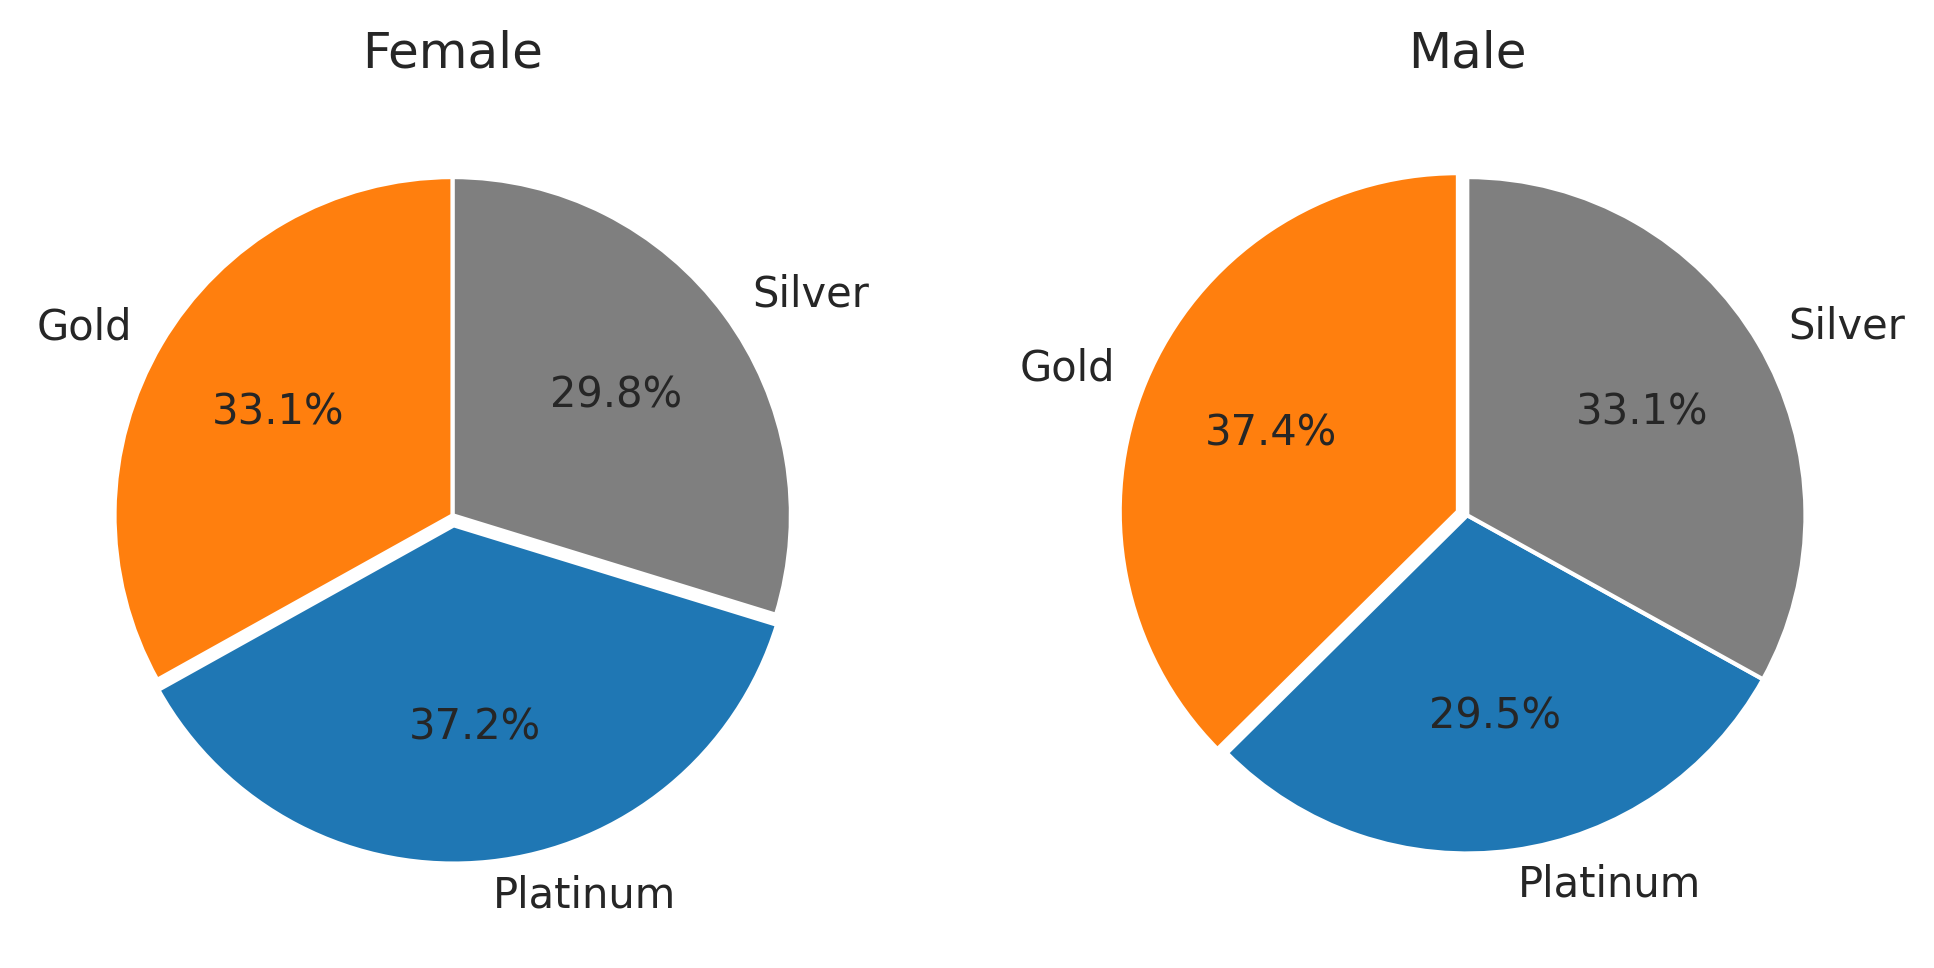

In [67]:
fig, axes = plt.subplots(1, 2, figsize = (8,5))
sns.set(rc={"figure.dpi":300})

plt.rcParams['font.size'] = 10

colors = ['tab:orange','tab:blue','tab:grey']
textprops = {"fontsize":10}

axes[0].pie(crosstab_data.values[:,0], labels = crosstab_data.index, 
        startangle = 90, radius = 1,
        colors = colors, textprops = textprops,
        explode =[0,0.03,0], autopct='%1.1f%%')

axes[1].pie(crosstab_data.values[:,1], labels = crosstab_data.index, 
        startangle = 90, radius = 1,
        colors = colors, textprops = textprops,
        explode =[0.03,0,0], autopct='%1.1f%%')


axes[0].set_title('Female',fontsize=12)
axes[1].set_title('Male',fontsize=12)

plt.show()

2. Claim amount for driver related incidents for each gender

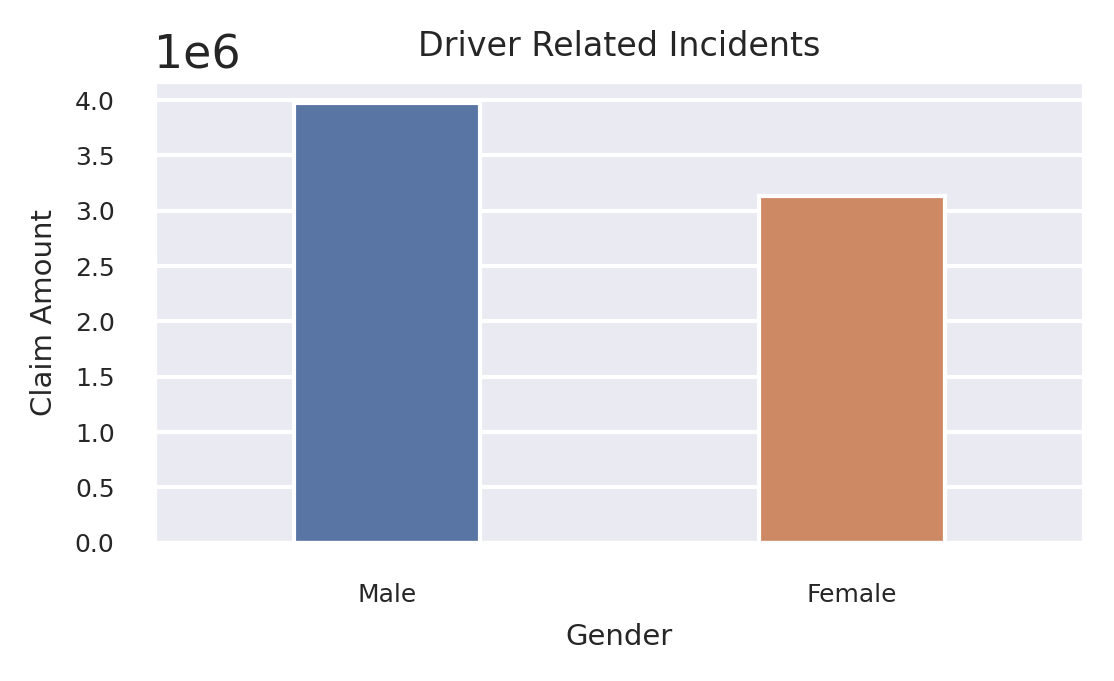

In [69]:
sns.set(rc={'figure.figsize':(4,2)})
sns.set(rc={"figure.dpi":300})

sns.barplot(data=cust_claims.loc[cust_claims['incident_cause'].
                                 isin(['Driver error','Other driver error'])],
            x="gender", y="claim_amount", estimator=np.sum,
            width=0.4, errorbar=None)

plt.tick_params(labelsize=6)
plt.xlabel('Gender', fontsize=7)
plt.ylabel('Claim Amount',fontsize=7)
plt.title('Driver Related Incidents',fontsize=8)

plt.show()

3. Fraudulent policy claims for each age-group

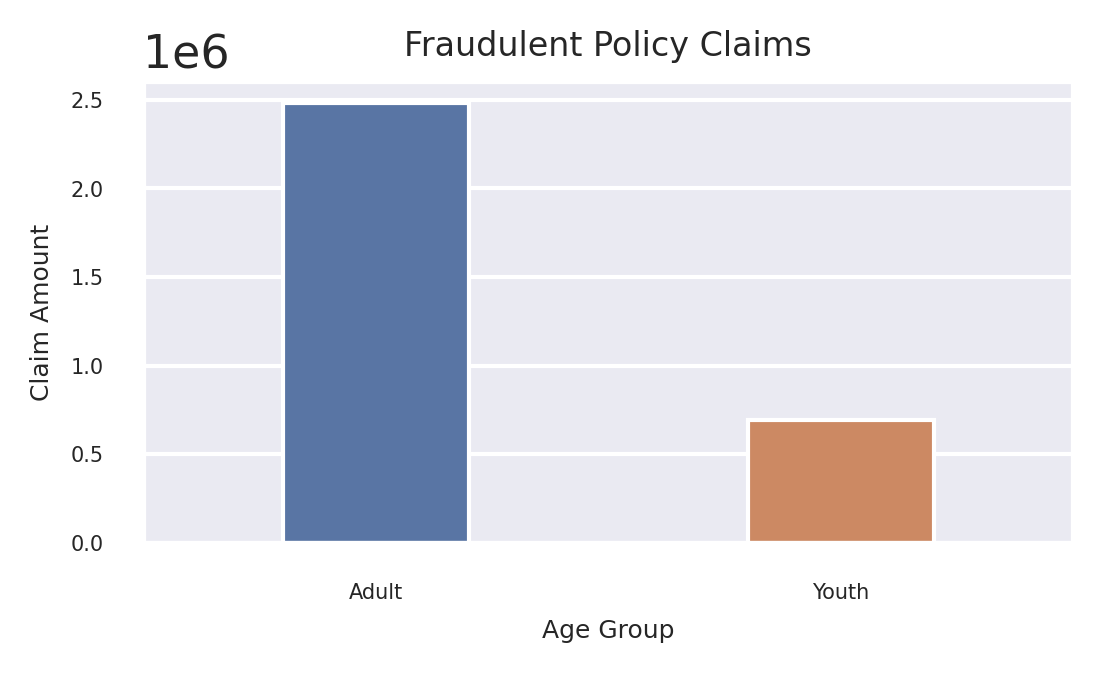

In [70]:
sns.set(rc={'figure.figsize':(4,2)})
sns.set(rc={"figure.dpi":300})

sns.barplot(data= cust_claims.loc[cust_claims['fraudulent']=='Yes'],
            x="Age_Group", y="claim_amount", estimator=np.sum,
           width=0.4, errorbar=None)

plt.tick_params(labelsize=5)
plt.xlabel('Age Group', fontsize=6)
plt.ylabel('Claim Amount',fontsize=6)
plt.title('Fraudulent Policy Claims',fontsize=8)

plt.show()

4. Monthly trend of the total claim amount by the customers

In [71]:
mnth_data = cust_claims.groupby(cust_claims['claim_date'].dt.month)['claim_amount'].sum()

mnth_list = cust_claims['claim_date'].dt.month_name().str[:3].unique()

mnth_data.index = mnth_list

In [72]:
mnth_data.index

Index(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'],
      dtype='object')

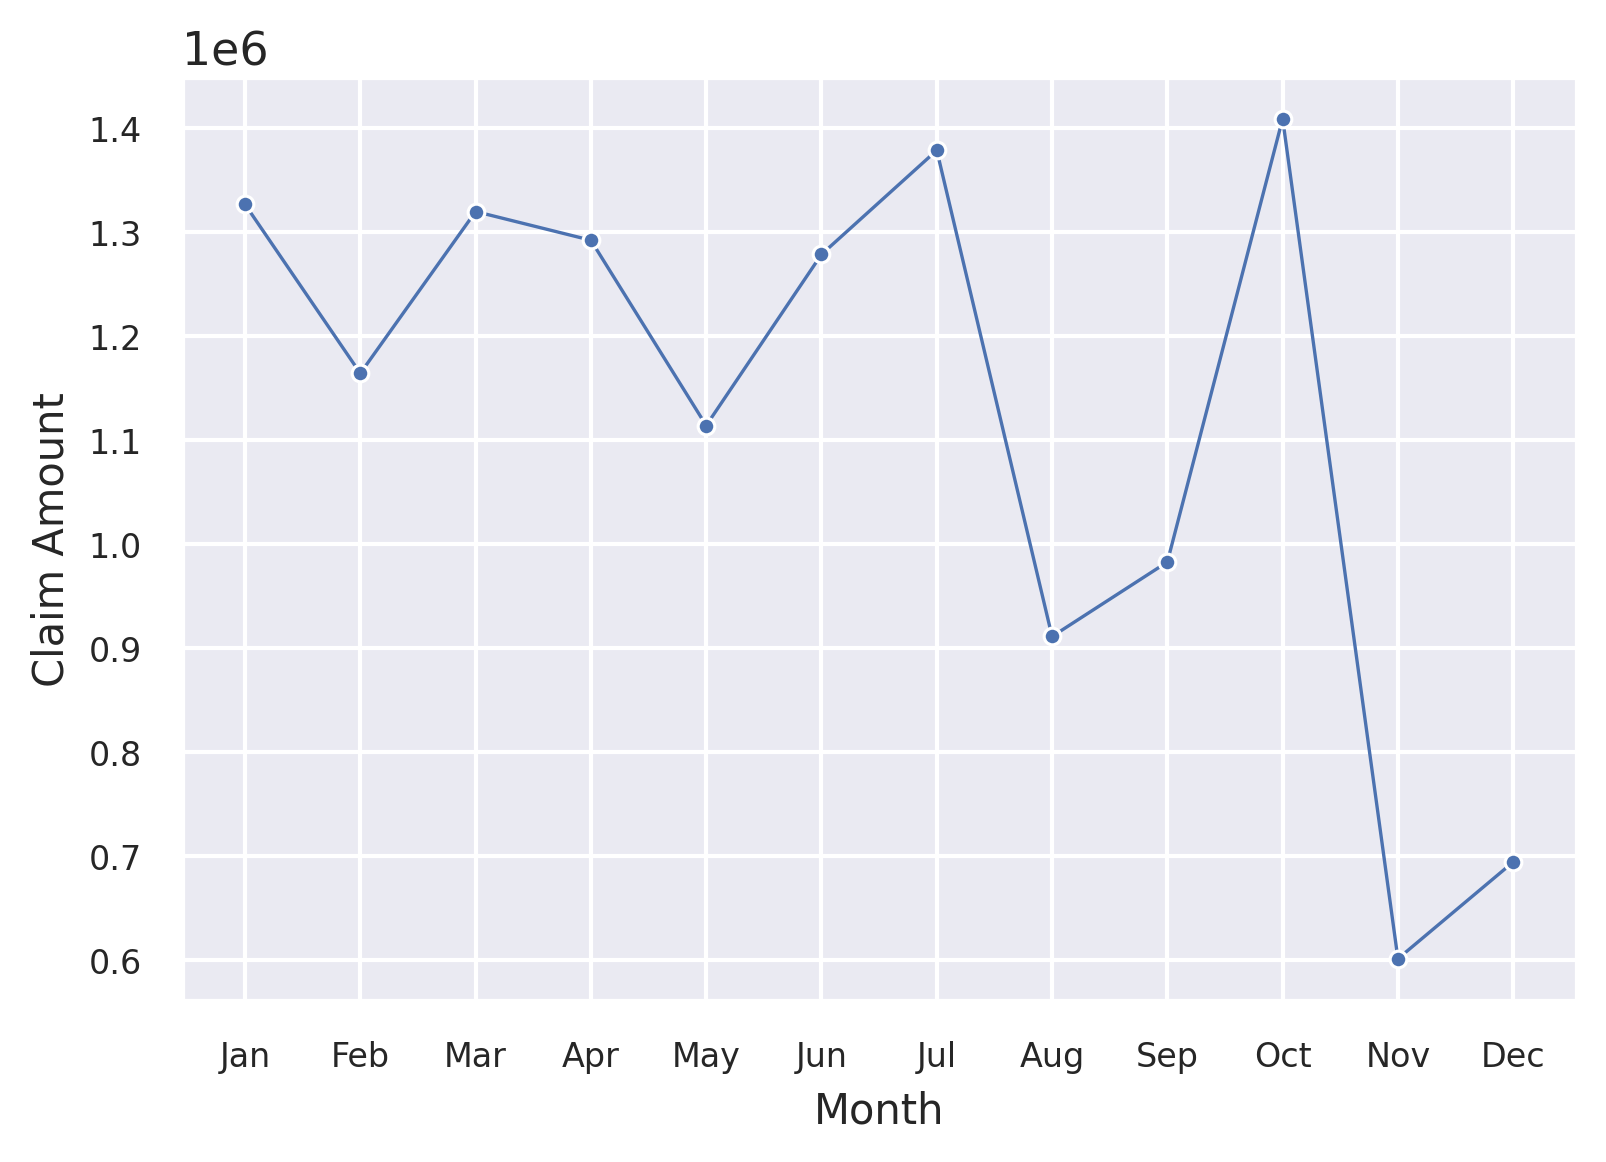

In [73]:
sns.set(rc={'figure.figsize':(6,4)})

sns.lineplot(x=mnth_data.index, y=mnth_data.values,marker='o',markersize=4,lw=0.8)

plt.tick_params(labelsize=8)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Claim Amount',fontsize=10)

plt.show()

Maximum claim amount is in the month of October and least in November.

5. Average claim amount for gender and age categories, 
for fraudulent and non-fraudulent claims.

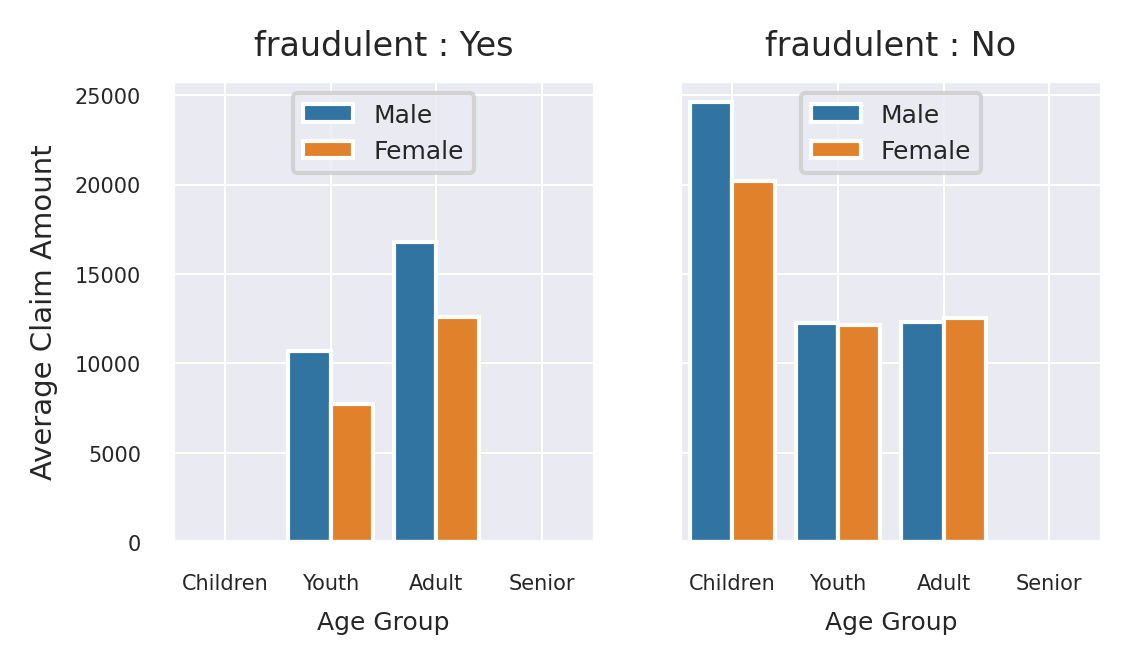

In [74]:
fig, axes = plt.subplots(1, 2, figsize = (4,2), sharey = True)

sns.barplot(data=cust_claims.loc[cust_claims['fraudulent']=='Yes'],
            x='Age_Group',y='claim_amount',estimator='mean',hue='gender',
            order=['Children','Youth','Adult','Senior'],hue_order=['Male','Female'],
            errorbar=None,palette=['tab:blue','tab:orange'],ax=axes[0])

sns.barplot(data=cust_claims.loc[cust_claims['fraudulent']=='No'],
            x='Age_Group',y='claim_amount',estimator='mean',hue='gender',
            order=['Children','Youth','Adult','Senior'],hue_order=['Male','Female'],
            errorbar=None,palette=['tab:blue','tab:orange'],ax=axes[1])

for i in range(0,2):
    axes[i].tick_params(labelsize=5, length = 4, width = 0.5)
    axes[i].legend(loc = 'best', fontsize = 6)
    axes[i].grid(lw = 0.5)
    axes[i].set_xlabel('Age Group', fontsize = 6)

axes[0].set_title('fraudulent : Yes',fontsize = 8)
axes[1].set_title('fraudulent : No',fontsize = 8)

axes[0].set_ylabel('Average Claim Amount', fontsize = 7)
axes[1].set_ylabel('')

plt.show()



Adult Male has maximum avg fraudulent claims and youth female has least.

#### Statistics

#### 1. Is there any similarity in the amount claimed by males and females?

In [75]:
cust_M = cust_claims[cust_claims['gender']=='Male']

In [76]:
cust_F = cust_claims[cust_claims['gender']=='Female']

In [77]:
cust_M['claim_amount'].mean().round()

12883.0

In [78]:
cust_F['claim_amount'].mean().round()

12099.0

In [79]:
cust_M['claim_amount'].count()

551

In [80]:
cust_F['claim_amount'].count()

527

 We run a hypothesis test to check if the amount claimed by males and females is statistically different or not.
Null Hypothesis H0 : We start with the assumption that the average amounts claimed by both the genders is similar.
    
The Alternate Hypothesis H1 will be that the amounts claimed by male and female are different (may be greater or lesser). This implies a two tailed test.
 
The sample size is greater than 30 (as seen by the count), so a z-test can be performed,
even though we do not know the population standard deviation.
Due to large sample size, from Central Limit Theorem, the condition of normality is also not important.
    
We set our significance level alpha as 0.05. In a two-tailed test, this is split as 0.025 on both the sides.
    
The Rejection region then becomes the values of test statistic Z <= -Z(2.5) and Z >= Z(2.5)
This means for a 2-tailed test we need a Z below -1.96 or above 1.96, for the difference to be significant.  

We require sample mean, sample standard deviation and sample size to conduct the test.
   
We calculate the z-statistic using the formula and then use the z-table to calculate the p-value from the z-score.
    
If the p-value is less than the significance level set by us(0.05) then we reject the Null Hypothesis that the 'claim amount by both the genders is similar'.
    
In python we implement this test by importing ztest from statsmodels.

In [81]:
from statsmodels.stats.weightstats import ztest as ztest

In [82]:
# Implementing the two tailed z-test
# The parameter 'value' is the mean difference for two sample test which we assume 0

tst_z = ztest(cust_M['claim_amount'],cust_F['claim_amount'] , value=0,alternative='two-sided') 
print(f"z-score: {tst_z[0]}\np-value: {tst_z[1]}")

z-score: 0.9620778099755283
p-value: 0.33601051971322204


###### Conclusion
As the p-value is more than 0.025, we fail to reject the Null Hypothesis. 

Alternatively, from z-score we can infer that since the score lies in between z crit of +/- 1.96 set by our significance level of 0.025 for two-tailed test (-1.96 < 0.9625 < 1.96), we fail to reject the null hypothesis. 

This implies that we do not have sufficient evidence to infer that the claim amount by males and females is significantly different from each other.


#### 2. Is there any relationship between age category and segment?

Since we have two categorical columns, we will do a chi-square test of independence to see if there is ny relationship between them.
Null Hypothesis H0: There is no relationship between the two categorical variables.

Alternate Hypothesis H1: There is a significant relation between them.

We choose an alpha (significance) of 0.05. If our p-value is less than 0.05 (or calculated value of chi square is greater than the critical chi-square value),we reject the null hypothesis.

The cross-tab data is as follows:

In [83]:
crosstab_data = pd.crosstab(index=cust_claims['Segment'],
           columns=cust_claims['Age_Group'], margins=True)

In [84]:
crosstab_data

Age_Group,Adult,Children,Youth,All
Segment,,,,
Gold,256,1,114,371
Platinum,237,1,123,361
Silver,237,0,109,346
All,730,2,346,1078


We first drop the column corresponding to 'Children' because
one of the requirements for chi-sq test of independence is that the frequency of each cell should be at least 5 in 80% of cells and that no cell should have an expected value less than 1.

The other assumptions of chi square test, that is observations are independent and mutually exclusive, are also met.

 We prepare a table of expected (calculated) values as:
    (row total*column total)/grand total
Then we find a chi-sq value for each data point using the formula
            (O-E)^2/E
            and sum it to get a calculated value of chi sq.

We then find the critical value of chi sq using the table, for which we need to find the degrees of freedom for the crosstab data, defined by (no.of rows – 1)* (no.of columns – 1).

Comparing the calculated and critical value of chi-sq values, we accept or reject the null hypothesis.

We implement this in python using the scipy library.

In [85]:
from scipy.stats import chi2_contingency

In [86]:
data = [[245,11,114],[226,11,123],[226,11,109]]

In [87]:
stat, p, dof, expected = chi2_contingency(data)

In [89]:
print(f'chi sq stat: {stat}\n p-value: {p}\n degrees of freedom:{dof}\
            \n expected contingency table {expected}')

chi sq stat: 1.0878030326557233
 p-value: 0.8962025318660247
 degrees of freedom:4            
 expected contingency table [[239.67472119  11.34758364 118.97769517]
 [233.19702602  11.04089219 115.76208178]
 [224.12825279  10.61152416 111.26022305]]


#### Since the p-value of 0.896 is more than 0.05, we do not have sufficient evidence to reject the Null Hypothesis.
Alternatively from the chi-sq table the critical value of chi-sq for dof = 4 and alpha = 0.05,
is 9.488. Since our calculated value (1.087) is less than 9.488, therefore we fail to reject the Null Hypothesis
that there is no significant relation between them.

#### Conclusion: There is no significant relation between Age Group and Segments of cards.

#### 3. The year 2018 has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [90]:
cust_claims_FY = cust_claims[(cust_claims['claim_date'] >= '2017-10-1') & 
            (cust_claims['claim_date'] <= '2018-9-30')]

In [91]:
cust_claims_FY['claim_amount'].mean().round()

12666.0

In [92]:
cust_claims_FY['claim_amount'].std()

13532.293179800849

In [93]:
cust_claims_FY['claim_amount'].count()

575

Since we don't know the previous year's standard deviation, we will use a t-test. We can also use
z test because for large sample sizes there is no much difference between z-test and t-test.

Null Hypothesis H0: There is no significant rise in claim amounts in the 2 years. Population Mean = 10000

Alternate Hypothesis H1: The rise in claim amount in the FY 2017-2018 is significant. Average > 10000

We set the significance level at 0.05

Our sample mean is 12668 and sample standard deviation is 13532.

Using the formula for the calculated t-value, we get 4.7278

dof = sample size-1 = 574

From t-table for dof = 574 and alpha = 0.05, we get t-crit = 1.65

In [94]:
from scipy.stats import ttest_1samp

In [95]:
t_stat, p_value = ttest_1samp(cust_claims_FY['claim_amount'], popmean=10000)

In [96]:
print(f't-stat {t_stat}\n p-value {p_value}')

t-stat 4.7247718447609435
 p-value 2.9004578875908625e-06


As the p-value is less than alpha, we reject the Null Hypothesis that there is no significant
rise in claim amount in the current year.

#### Conclusion: The current year has shown a significant rise in claim amounts.

#### 4. Is there any difference between age groups and insurance claims?

In [97]:
cust_claims.groupby('Age_Group')['claim_amount'].mean().round()

Age_Group
Adult       12921.0
Children    22405.0
Youth       11553.0
Name: claim_amount, dtype: float64

In [98]:
cust_claims['Age_Group'].value_counts()

Adult       730
Youth       346
Children      2
Name: Age_Group, dtype: int64

Since we have only 2 'Children', we will keep them out of the test.

In [99]:
data_Adult = cust_claims[cust_claims['Age_Group']=='Adult']
data_Youth = cust_claims[cust_claims['Age_Group']=='Youth']

In [100]:
data_Adult['claim_amount'].std()

13581.522613941492

In [101]:
data_Youth['claim_amount'].std()

12875.586464382755

Null Hypothesis H0: The average insurance claims across both the age groups is similar.

Alternate Hypothesis H1: There is a significant difference between insurance claims of both the groups. 

Significance level is set at 0.05

We will perform two-tailed z-test.

In [103]:
tst_z = ztest(data_Adult['claim_amount'],data_Youth['claim_amount'] , value=0,
              alternative='two-sided') 
print(f"z-score: {tst_z[0]}\np-value: {tst_z[1]}")

z-score: 1.5699646437847392
p-value: 0.11642333695407456


 Since the p-value of 1.57 is greater than the significance level set by us, 
so we fail to reject the Null Hypothesis.

#### Conclusion: Average insurance claims across age groups is similar.

#### 5. Is there any relationship between total number of policy claims and the claimed amount?

In [104]:
data = cust_claims[['total_policy_claims','claim_amount']]

In [105]:
data['total_policy_claims'].value_counts()

1.0    789
2.0    105
3.0     85
4.0     59
5.0     27
6.0     10
7.0      2
8.0      1
Name: total_policy_claims, dtype: int64

In [106]:
data.groupby('total_policy_claims')['claim_amount'].mean()

total_policy_claims
1.0    12519.557755
2.0    13765.521195
3.0    12629.424567
4.0    11106.921402
5.0     8530.254176
6.0    14286.768137
7.0    23033.000000
8.0     3277.500000
Name: claim_amount, dtype: float64

Total_policy_claims is categorical, numerical and ordinal data. We will do ANOVA test since we have multiple groups to test.

The length of each group should be at least 1, and at least one group with length greater than 1.
As the above criteria is satisfied so we can run an ANOVA test on all the groups.

Null Hypothesis H0: The claim amount for total number of policy claims is similar.

Alternate Hypothesis H1: The mean of at least one of the groups differ.

In [108]:
from scipy.stats import f_oneway

In [109]:
f_oneway(data.loc[data['total_policy_claims']== 1.0,'claim_amount'],
         data.loc[data['total_policy_claims']== 2.0,'claim_amount'],
         data.loc[data['total_policy_claims']== 3.0,'claim_amount'],
         data.loc[data['total_policy_claims']== 4.0,'claim_amount'],
         data.loc[data['total_policy_claims']== 5.0,'claim_amount'],
         data.loc[data['total_policy_claims']== 6.0,'claim_amount'],
         data.loc[data['total_policy_claims']== 7.0,'claim_amount'],
         data.loc[data['total_policy_claims']== 8.0,'claim_amount'])

F_onewayResult(statistic=0.8381621906601839, pvalue=0.5556262018615258)

As p-value is greater than 0.05, we fail to reject the Null Hypothesis.

#### Conclusion: The claim amount for total number of policy claims is similar. 
Hence there is no significant relationship between the claimed amount and total policy claims.